# Dive into Deep Learning
# Ch 2. Preliminaries

## intro
To prepare for your dive into deep learning, you will need a few survival skills

    딥러닝에 대한 다이빙을 준비하려면 다음과 같은 몇 가지 생존 기술이 필요합니다.

(i) techniques for storing and manipulating data

    데이터 저장 및 조작 기술

(ii) libraries for ingesting and preprocessing data from a variety of sources

    다양한 소스의 데이터를 수집하고 전처리하기 위한 라이브러리

(iii) knowledge of the basic linear algebraic operations that we apply to high-dimensional data elements

    고차원 데이터 요소에 적용되는 기본 선형 대수 연산에 대한 지식

(iv) just enough calculus to determine which direction to adjust each parameter in order to decrease the loss function

    손실 함수를 줄이기 위해 각 매개변수를 조정할 방향을 결정하기에 충분한 미적분

(v) the ability to automatically compute derivatives so that you can forget much of the calculus you just learned

    방금 배운 미적분의 대부분을 잊어버릴 수 있도록 도함수를 자동으로 계산하는 기능

(vi) some basic fluency in probability, our primary language for reasoning under uncertainty

    불확실성 하에서 추론하기 위한 기본 언어인 확률의 기본적인 유창성

(vii) some aptitude for finding answers in the official documentation when you get stuck.

    문제가 생겼을 때 공식 문서에서 답을 찾는 능력.

## Data Manipulation

To conduct any task, we require a method to store and manage data. Two significant steps with data include acquisition and in-computer processing. We primarily deal with $n$-dimensional arrays, or tensors. Familiarity with the NumPy scientific computing package will simplify this.

 어떤 작업을 수행하려면 데이터를 저장하고 관리하는 방법이 필요합니다. 데이터와 관련하여 중요한 두 단계는 획득 및 컴퓨터 내부에서의 처리입니다. 우리는 주로 $n$-차원 배열 또는 텐서를 다룹니다. NumPy 과학 계산 패키지에 익숙하다면 이를 이해하는데 도움이 됩니다.

### Indexing and Slicing

Tensor elements are accessible through indexing, with indexing starting at 0. Negative indexing allows for position-based element access from the end of the list. Slicing can be used for accessing a range of indices (e.g., X[start:stop]), the returned value includes the first index (start) but not the last (stop). When only one index (or slice) is specified for a $k^\mathrm{th}$ order tensor, it is applied along axis 0.

텐서 요소는 인덱싱을 통해 접근할 수 있으며, 인덱싱은 0부터 시작합니다. 음의 인덱싱을 사용하면 리스트의 끝에 상대적인 위치를 기반으로 요소에 접근할 수 있습니다. 슬라이싱은 일련의 인덱스에 접근하는 데 사용할 수 있습니다.

In [1]:
import torch
x = torch.arange(12, dtype=torch.float32)
X = x.reshape(3, 4)
X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [2]:
X[1, 2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

To assign multiple elements the same value, we apply the indexing on the left-hand side of the assignment operation.

여러 요소에 동일한 값을 할당하려면, 할당 연산의 왼쪽에 인덱싱을 적용합니다.

In [3]:
X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### Operations

With the knowledge of tensor construction, reading, and writing elements, we can proceed with manipulating them using mathematical operations. Elementwise operations apply a standard scalar operation to each element of a tensor. Unary operators like $e^x$ can be applied elementwise as well.

텐서 구조, 읽기 및 쓰기 요소를 이해하게 되면, 우리는 수학적 연산을 사용하여 그것들을 조작하는 데 나아갈 수 있습니다. 요소별 연산은 텐서의 각 요소에 표준 스칼라 연산을 적용합니다. 단항 연산자들도 요소별로 적용될 수 있습니다.

In [4]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

Unary operators such as torch.exp(x) can be applied elementwise as well. Binary scalar operators, which map pairs of real numbers to a single real number, can also be extended to vectors of the same shape. This operation can be thought of as lifting the scalar function to an elementwise vector operation. Standard arithmetic operators have been lifted to elementwise operations for identically-shaped tensors.

다음과 같은 단항 연산자인 torch.exp(x)도 요소별로 적용될 수 있습니다. 또한 두 개의 실수를 하나의 실수로 매핑하는 이항 스칼라 연산자도 동일한 모양의 벡터로 확장될 수 있습니다. 이 작업은 스칼라 함수를 요소별 벡터 연산으로 '올리는' 것으로 생각할 수 있습니다. 표준 산술 연산자들은 동일한 모양의 텐서에 대한 요소별 연산으로 '올려졌습니다'.

In [5]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

We can also concatenate multiple tensors together, forming a larger tensor. This process depends on the axis along which we concatenate.

우리는 또한 여러 텐서를 연결하여 더 큰 텐서를 형성할 수 있습니다. 이 과정은 우리가 연결하는 축에 따라 달라집니다.

In [6]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [7]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [8]:
X.sum()

tensor(66.)

### Broadcasting

Under certain conditions, we can perform elementwise binary operations on tensors of different shapes by using the broadcasting mechanism. Broadcasting works as follows: (i) expand one or both arrays by copying elements along axes with length 1 to make the shapes compatible; (ii) perform an elementwise operation on the resulting arrays.

브로드캐스팅 메커니즘을 사용하면 형상이 다른 텐서에 대해 요소별 이진 연산을 수행할 수 있습니다. 브로드캐스팅은 다음과 같은 두 단계로 진행됩니다: (i) 길이가 1인 축을 따라 요소를 복사하여 하나 이상의 배열을 확장하여 두 텐서의 형상을 호환 가능하게 만듭니다. (ii) 결과로 나온 배열에 대해 elementwise 연산을 수행합니다.

In [9]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

Since `a` and `b` are $3\times1$ and $1\times2$ matrices, respectively, their shapes do not match up. Broadcasting produces a larger $3\times2$ matrix by replicating matrix `a` along the columns and matrix `b` along the rows before adding them elementwise.

`a`와 `b`는 각각 $3\times1$ 및 $1\times2$ 행렬이므로 그 모양이 일치하지 않습니다. 브로드캐스팅은 행렬 `a`를 열을 따라 복제하고 행렬 `b`를 행을 따라 복제하여 더 큰 $3\times2$ 행렬을 생성한 후 요소별로 추가합니다.

In [10]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

### Saving Memory

In this example, when we execute Y = Y + X, a new memory allocation is performed for the result of Y + X. As a result, the variable Y is reassigned to point to this new memory location, indicated by a different id(Y). This behavior can be problematic for two reasons.

예를 들어, Y = X + Y라고 작성하면, Y가 이전에 가리키던 텐서를 참조 해제하고 새롭게 할당된 메모리를 가리키도록 한다. id() 함수를 사용하여 객체의 정확한 메모리 주소를 얻을 수 있는 Python의 id() 함수를 사용하여 이 문제를 설명할 수 있다. Y = Y + X를 실행한 후에는 id(Y)가 다른 위치를 가리킨다는 것을 알 수 있다. 이는 Python이 먼저 Y + X를 평가하고 결과에 대해 새로운 메모리를 할당한 다음 Y를 이 새로운 메모리 위치로 지정하기 때문이다.

In [11]:
before = id(Y)
Y = Y + X
id(Y) == before

False

First, frequent memory allocation can be inefficient, especially when dealing with large tensors and performing updates multiple times per second in machine learning applications. Ideally, we want to perform these updates in place to avoid unnecessary memory allocation.

Second, if multiple variables point to the same parameters, not updating in place can lead to memory leaks or references to stale parameters. Therefore, it's important to update all the references consistently.


이는 두 가지 이유로 원하지 않을 수 있다. 첫째로, 우리는 불필요하게 메모리를 계속해서 할당하는 것을 원하지 않는다. 머신 러닝에서는 종종 수백 메가바이트의 매개변수가 있고 이들을 초당 여러 번 업데이트한다. 가능하면 이러한 업데이트를 in-place로 수행하고 싶다. 둘째로, 여러 변수에서 동일한 매개변수를 가리킬 수 있다. In-place 업데이트하지 않으면 이러한 참조를 모두 업데이트해야 하며, 그렇지 않으면 메모리 누수가 발생하거나 오래된 매개변수를 참조할 수 있다.

Fortunately, performing in-place operations is straightforward in Python. We can assign the result of an operation to a pre-allocated array Y using slice notation: Y[:] = <expression>. This allows us to update the values of Y without changing its memory location. Here's an example:

다행히도, in-place 연산을 수행하는 것은 쉽다. 미리 할당된 배열 Y에 연산의 결과를 할당하기 위해 슬라이스 표기법을 사용할 수 있다: Y[:] = <식>. 이 개념을 설명하기 위해, zeros_like를 사용하여 초기화한 후 텐서 Z의 값을 Y와 동일한 모양으로 덮어씌우는 예제를 살펴보자.

In [12]:
Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 139959156107680
id(Z): 139959156107680


[**If the value of X is not reused in subsequent computations, we can further reduce the memory overhead by using X[:] = X + Y or X += Y.**]

[**만약 X의 값이 이후의 계산에서 재사용되지 않는다면, X[:] = X + Y 또는 X += Y를 사용하여 연산의 메모리 오버헤드를 줄일 수도 있다.**]

In [13]:
before = id(X)
X += Y
id(X) == before

True

In the final code snippet, we update the values of X in place using X += Y. This operation modifies X directly, avoiding the need for a new memory allocation if X is not reused later.

By leveraging in-place operations and updating tensors directly, we can effectively save memory and optimize the computational efficiency of our code.

위의 코드 스니펫에서는 X += Y를 사용하여 X의 값을 곧바로 업데이트하여 메모리 오버헤드를 줄인다. 이 작업은 X가 이후에 재사용되지 않는 경우 새로운 메모리 할당이 필요하지 않도록 한다.

in-place 연산과 텐서를 직접적으로 업데이트하여 메모리를 효과적으로 절약하고 코드의 계산 효율성을 최적화할 수 있다.

## Data Preprocessing

To apply deep learning in real-world scenarios, we often need to preprocess and extract valuable information from raw data. The pandas library provides powerful tools for data manipulation and preprocessing. Here, we will focus on loading CSV files and performing basic operations using pandas.

실제 상황에서 딥러닝을 적용하기 위해서는 원시 데이터에서 가치 있는 정보를 추출하고 전처리하는 작업이 필요합니다. pandas 라이브러리는 데이터 조작과 전처리를 위한 강력한 도구를 제공합니다. 여기에서는 CSV 파일을 로드하고 pandas를 사용하여 기본 작업을 수행하는 방법에 초점을 맞출 것입니다.

### Reading the Dataset

One of the most common formats for storing tabular data is the Comma-Separated Values (CSV) format. Each line in a CSV file represents a record, and the fields within a record are separated by commas. To demonstrate how to load CSV files using pandas, we will create a sample dataset file called house_tiny.csv. This dataset contains information about homes, including the number of rooms, roof type, and price.

탭ular(테이블 형태의) 데이터를 저장하는 가장 일반적인 형식 중 하나는 쉼표로 구분된 값 (CSV) 형식입니다. CSV 파일에서 각 줄은 레코드를 나타내며, 레코드 내의 필드는 쉼표로 구분됩니다. pandas를 사용하여 CSV 파일을 로드하는 방법을 보여주기 위해 house_tiny.csv라는 샘플 데이터셋 파일을 만들겠습니다. 이 데이터셋은 방의 수, 지붕 종류 및 가격과 같은 주택에 대한 정보를 포함합니다.

In [14]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('''NumRooms,RoofType,Price
NA,NA,127500
2,NA,106000
4,Slate,178100
NA,NA,140000''')

In [15]:
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms RoofType   Price
0       NaN      NaN  127500
1       2.0      NaN  106000
2       4.0    Slate  178100
3       NaN      NaN  140000


The read_csv function reads the CSV file and creates a DataFrame, which is a tabular data structure provided by pandas. We can then perform various operations on the DataFrame to preprocess the data further.

read_csv 함수는 CSV 파일을 읽어와 DataFrame이라는 테이블 형태의 데이터 구조로 만듭니다. 이후에는 DataFrame에서 추가적인 데이터 전처리 작업을 수행할 수 있습니다.

### Data Preparation

In supervised learning, we train models to predict a target value based on input values. The first step in processing the dataset is to separate the columns for input and target values. This can be done by selecting columns by name or index using iloc.

지도 학습에서는 입력 값에 기반하여 지정된 목표(target) 값을 예측하는 모델을 훈련합니다. 데이터셋을 처리하는 첫 번째 단계는 입력과 목표 값을 나타내는 열을 분리하는 것입니다. 열은 이름이나 정수 기반의 위치 인덱싱(iloc)을 사용하여 선택할 수 있습니다.

Missing values are common in data science and are often represented as NA or empty entries. They can be handled through imputation or deletion. Imputation replaces missing values with estimates, while deletion removes rows or columns containing missing values.

결측값은 데이터 과학에서 흔하게 발생하며, NA나 빈 엔트리로 표시될 수 있습니다. 결측값은 대체(imputation) 또는 삭제(deletion)를 통해 처리할 수 있습니다. 대체는 결측값을 추정치로 대체하는 것이고, 삭제는 결측값을 포함하는 행이나 열을 제거하는 것입니다.

For categorical input fields, NaN can be treated as a separate category. For example, the RoofType column can be split into RoofType_Slate and RoofType_nan columns. Rows with Slate as the roof type will have RoofType_Slate set to 1 and RoofType_nan set to 0, while rows with missing RoofType values will have the opposite values.

범주형 입력 필드의 경우, NaN은 별도의 범주로 처리할 수 있습니다. 예를 들어, RoofType 열은 RoofType_Slate와 RoofType_nan 열로 분리할 수 있습니다. Slate인 경우 RoofType_Slate는 1이 되고 RoofType_nan은 0이 됩니다. 반면, RoofType 값이 결측값인 행은 그 반대의 값을 가지게 됩니다.

In [16]:
inputs, targets = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       NaN               0             1
1       2.0               0             1
2       4.0               1             0
3       NaN               0             1


For missing numerical values, a common approach is to replace them with the mean value of the corresponding column.

숫자형 결측값의 경우, 일반적인 방법은 해당 열의 평균값으로 결측값을 대체하는 것입니다.

In [17]:
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms  RoofType_Slate  RoofType_nan
0       3.0               0             1
1       2.0               0             1
2       4.0               1             0
3       3.0               0             1


Data preparation is an important step in training deep learning models, where missing values need to be handled appropriately.

데이터 준비는 결측값을 적절히 처리해야 하는 딥러닝 모델 훈련의 중요한 단계입니다.

### Conversion to the Tensor Format

Now that [**all the entries in `inputs` and `targets` are numerical, we can load them into a tensor**]

이제 입력 및 대상의 모든 항목이 숫자이므로 텐서에 로드할 수 있습니다.

In [18]:
import torch

X, y = torch.tensor(inputs.values), torch.tensor(targets.values)
X, y

(tensor([[3., 0., 1.],
         [2., 0., 1.],
         [4., 1., 0.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

### Discussion

Data Processing Complexity: Data may span multiple files and tables, making processing complex.

데이터 처리의 복잡성: 데이터는 여러 파일과 테이블에 걸쳐 있을 수 있어 처리가 복잡해질 수 있습니다.

Data Types Variety: Data comes in many forms such as text, images, and audio, not just categorical and numeric.

다양한 데이터 유형: 데이터는 범주형과 수치형뿐만 아니라 텍스트, 이미지, 오디오 등 다양한 형태로 제공됩니다.

Advanced Tools Requirement: Advanced tools and algorithms are necessary to prevent data processing from becoming a bottleneck in machine learning.

고급 도구의 필요성: 데이터 처리가 머신 러닝에서 병목이 되지 않도록 하기 위해 고급 도구와 알고리즘이 필요합니다.

Data Quality: Attention must be paid to real-world data issues like outliers, faulty measurements, and recording errors.

데이터 품질: 이상치, 잘못된 측정값, 기록 오류 등과 같은 실제 데이터 문제에 주의를 기울여야 합니다.

Data Visualization Tools: Tools like seaborn, Bokeh, and matplotlib aid in inspecting data and identifying potential problems.

데이터 시각화 도구: seaborn, Bokeh, matplotlib과 같은 도구를 사용하여 데이터를 검사하고 잠재적인 문제를 식별할 수 있습니다.


## Linear Algebra

By now, we can load datasets into tensors and manipulate these tensors with basic mathematical operations. To start building sophisticated models, we will also need a few tools from linear algebra. 

이제 데이터 세트를 텐서에 로드하고 기본 수학 연산으로 이러한 텐서를 조작할 수 있습니다. 정교한 모델 구축을 시작하려면 선형 대수학의 몇 가지 도구도 필요합니다.

### Scalars

In mathematics, scalars are individual real numbers without direction. They are used in everyday computations, such as converting temperatures. Scalars are often denoted by lower-case letters and are considered members of the real number space, denoted by $\mathbb{R}$. For instance, the variables in the equation $c = \frac{5}{9}(f - 32)$ are all scalars. In programming, scalars can be implemented as tensors containing just one element.

수학에서 스칼라는 방향을 가지지 않는 개별 실수를 의미합니다. 이들은 온도 변환 같은 일상적인 계산에 사용됩니다. 스칼라는 종종 소문자로 표현되며, 실수 공간인 $\mathbb{R}$의 구성원으로 간주됩니다. 예를 들어, 방정식 $c = \frac{5}{9}(f - 32)$의 변수들은 모두 스칼라입니다. 프로그래밍에서는 스칼라를 하나의 요소만을 포함하는 텐서로 구현할 수 있습니다.

In [19]:
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x + y, x * y, x / y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

Here, it's creating two scalar tensors x and y with the values 3.0 and 2.0 respectively. Then, it performs standard mathematical operations on these tensors:

여기서는 값이 각각 3.0과 2.0인 두 개의 스칼라 텐서 x와 y를 생성합니다. 그런 다음 다음 텐서에서 표준 수학 연산을 수행합니다.

When this code is run, the output is a tuple of four elements, each of which is a result of the corresponding operation: (5.0, 6.0, 1.5, 9.0). This indicates that x + y is 5.0, x * y is 6.0, x / y is 1.5, and x raised to the power y (or x**y) is 9.0.


이 코드가 실행되면 출력은 4개 요소의 튜플이며 각 요소는 해당 작업의 결과입니다: (5.0, 6.0, 1.5, 9.0). 이는 x + y가 5.0, x * y가 6.0, x / y가 1.5이고 x의 y승(또는 x**y)이 9.0임을 나타냅니다.

### 벡터

A vector is a tuple consisting of one or more scalar values. It can be denoted in various ways:

벡터는 하나 이상의 스칼라 값으로 구성된 튜플입니다. 이는 다양한 방식으로 표현될 수 있습니다

$v = (a_1, a_2, a_3) = [a_1, a_2, a_3]$ or 
$v = \begin{pmatrix}a_1\\a_2\\a_3\end{pmatrix} = \begin{bmatrix}a_1\\a_2\\a_3\end{bmatrix}$

Vectors have distinct mathematical operations, including the dot product and the cross product. The dot product of two vectors, $u$ and $v$, produces a scalar and is computed as $u \cdot v = |u||v|cos\theta$, where $\theta$ is the angle between the two vectors.

벡터는 내적과 외적이라는 고유한 수학적 연산을 가지고 있습니다. 두 벡터 $u$와 $v$의 내적은 스칼라를 생성하며, 이는 $u \cdot v = |u||v|cos\theta$로 계산됩니다. 여기서 $\theta$는 두 벡터 사이의 각입니다.

On the other hand, the cross product, denoted as $u\times v$, results in a new vector. Its direction is perpendicular to both $u$ and $v$, and its magnitude is $|u||v|sin\theta$, signifying the area of the parallelogram with $u$ and $v$ as sides.

반면에, 외적은 $u\times v$로 표시되며, 새로운 벡터를 생성합니다. 그 방향은 $u$와 $v$ 모두에게 수직이며, 그 크기는 $|u||v|sin\theta$로, 이는 $u$와 $v$가 변인 평행사변형의 넓이를 의미합니다.

In [20]:
x = torch.arange(3)
x

tensor([0, 1, 2])

We can refer to an element of a vector by using a subscript. For example, $x_2$ denotes the second element of $\mathbf{x}$. Since $x_2$ is a scalar, we do not bold it. By default, we visualize vectors by stacking their elements vertically.

벡터의 요소는 첨자(subscript)를 사용하여 나타낼 수 있습니다. 예를 들어, $x_2$는 $\mathbf{x}$의 두 번째 요소를 나타냅니다. $x_2$는 스칼라이므로 굵게 표시하지 않습니다. 기본적으로, 우리는 벡터를 요소를 세로로 쌓아서 시각화합니다.

$$\mathbf{x} =\begin{bmatrix}x_{1}  \\ \vdots  \\x_{n}\end{bmatrix},$$


Here $x_1, \ldots, x_n$ are elements of the vector. Later on, we will distinguish between such *column vectors* and *row vectors* whose elements are stacked horizontally. Recall that [**we access a tensor's elements via indexing.**]


여기서 $x_1, \ldots, x_n$은 벡터의 요소입니다. 나중에는 이러한 열 벡터와 가로로 쌓인 행 벡터를 구분할 것입니다. 기억해주세요. [**텐서의 요소에는 색인(indexing)을 통해 접근합니다.**]

In [21]:
x[2]

tensor(2)

To indicate that a vector contains $n$ elements, we write $\mathbf{x} \in \mathbb{R}^n$. Formally, we call $n$ the *dimensionality* of the vector. 

벡터가 $n$개의 요소를 포함한다는 것을 나타내기 위해 $\mathbf{x} \in \mathbb{R}^n$와 같이 표기합니다. 형식적으로, 우리는 $n$을 벡터의 차원이라고 부릅니다.

In [22]:
len(x)

3

In [23]:
x.shape

torch.Size([3])

### Matrices

Matrices are 2nd-order tensors, denoted by bold capital letters (e.g., $\mathbf{X}$, $\mathbf{Y}$, $\mathbf{Z}$). In code, matrices are represented as tensors with two axes. A matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ contains $m \times n$ real-valued scalars arranged in $m$ rows and $n$ columns. If $m = n$, the matrix is called square.


행렬은 2차 텐서로, 굵은 대문자로 표기됩니다 (예: $\mathbf{X}$, $\mathbf{Y}$, $\mathbf{Z}$). 코드에서는 행렬을 두 개의 축을 가진 텐서로 표현합니다. 행렬 $\mathbf{A} \in \mathbb{R}^{m \times n}$은 $m$개의 행과 $n$개의 열로 구성된 $m \times n$개의 실수값을 포함합니다. 만약 $m = n$이라면, 해당 행렬은 "정사각 행렬"이라고 합니다.


Individual elements in a matrix are referred to using subscripts for row and column indices. For example, $a_{ij}$ represents the value in the $i^{\mathrm{th}}$ row and $j^{\mathrm{th}}$ column of matrix $\mathbf{A}$.
행렬의 개별 요소는 행과 열 인덱스의 하위 첨자(subscript)를 사용하여 표기합니다. 예를 들어, $a_{ij}$는 행렬 $\mathbf{A}$의 $i$번째 행과 $j$번째 열에 위치한 값을 나타냅니다.


$$\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.$$



In code, a matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$ is represented as a 2nd-order tensor with shape ($m$, $n$). To convert a tensor of size $m \times n$ to a matrix, we can use the reshape function with the desired shape ($m$, $n$).


코드에서 행렬 $\mathbf{A} \in \mathbb{R}^{m \times n}$은 ($m$, $n$) 모양의 2차 텐서로 표현됩니다. $m \times n$ 크기의 텐서를 행렬로 변환하기 위해서는 reshape 함수를 사용하면 됩니다.

In [24]:
A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

Sometimes, we want to flip the axes. When we exchange a matrix's rows and columns, the result is called its *transpose*. Formally, we signify a matrix $\mathbf{A}$'s transpose by $\mathbf{A}^\top$ and if $\mathbf{B} = \mathbf{A}^\top$, then $b_{ij} = a_{ji}$ for all $i$ and $j$. Thus, the transpose of an $m \times n$ matrix is an $n \times m$ matrix:

때로는 축을 뒤집고 싶을 때가 있습니다. 행렬의 행과 열을 교환하여 얻는 결과를 *전치(transpose)*라고 합니다. 수식적으로 행렬 $\mathbf{A}$의 전치는 $\mathbf{A}^\top$로 표기하며, 만약 $\mathbf{B} = \mathbf{A}^\top$이라면, 모든 $i$와 $j$에 대해 $b_{ij} = a_{ji}$입니다. 따라서 $m \times n$ 행렬의 전치는 $n \times m$ 행렬이 됩니다:


$$
\mathbf{A}^\top =
\begin{bmatrix}
    a_{11} & a_{21} & \dots  & a_{m1} \\
    a_{12} & a_{22} & \dots  & a_{m2} \\
    \vdots & \vdots & \ddots  & \vdots \\
    a_{1n} & a_{2n} & \dots  & a_{mn}
\end{bmatrix}.
$$

In code, we can access any (**matrix's transpose**) as follows:

코드에서는 (행렬의 전치)를 다음과 같이 얻을 수 있습니다.


In [25]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

[**Symmetric matrices are the subset of square matrices that are equal to their own transposes: $\mathbf{A} = \mathbf{A}^\top$.**] The following matrix is symmetric:

[대칭 행렬은 자신의 전치와 같은 정사각 행렬의 하위 집합입니다: $\mathbf{A} = \mathbf{A}^\top$.] 다음 행렬은 대칭 행렬입니다:

In [26]:
A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

Matrices are useful for representing datasets. Typically, rows correspond to individual records and columns correspond to distinct attributes.

행렬은 데이터셋을 표현하는 데 유용합니다. 일반적으로 행은 개별 레코드를 나타내고 열은 서로 다른 속성을 나타냅니다.

### Tensors

Tensors are higher-order arrays that provide a way to describe extensions beyond scalars, vectors, and matrices. In machine learning, tensors are represented by software objects of the tensor class, allowing for arbitrary numbers of axes. Tensors are denoted by capital letters with a special font face and can be indexed using a similar mechanism as matrices.

텐서는 스칼라, 벡터 및 행렬을 넘어서는 확장을 설명하는 데 사용되는 고차원 배열입니다. 머신 러닝에서 텐서는 텐서 클래스의 소프트웨어 객체로 표현되며 임의의 축 수를 지원합니다. 텐서는 특별한 글꼴로 대문자로 표시되며 행렬과 유사한 방식으로 인덱싱될 수 있습니다.

Tensors become particularly important when working with images. Images are represented as 3rd-order tensors, with axes corresponding to height, width, and channels (such as red, green, and blue). Collections of images are represented by 4th-order tensors, with distinct images indexed along the first axis. Higher-order tensors are constructed by increasing the number of shape components.

이미지 처리에서 텐서는 특히 중요합니다. 이미지는 3차원 텐서로 표현되며 높이, 너비 및 채널 (예: 빨강, 초록, 파랑)에 해당하는 축을 가지고 있습니다. 이미지의 모음은 4차원 텐서로 표현되며 각각의 이미지는 첫 번째 축을 따라 인덱싱됩니다. 고차원 텐서는 모양 구성 요소의 수를 증가시킴으로써 생성됩니다.

In [27]:
torch.arange(24).reshape(2, 3, 4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### Basic Properties of Tensor Arithmetic

Scalars, vectors, matrices, and higher-order tensors all have some handy properties. For example, lementwise operations produce outputs that have the same shape as their operands.

스칼라, 벡터, 행렬 및 고차원 텐서는 유용한 몇 가지 특성을 갖고 있습니다. 예를 들어, 요소별 연산은 출력 결과가 피연산자와 동일한 형태를 갖습니다.

In [28]:
A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

The [**elementwise product of two matrices is called their *Hadamard product***] (denoted $\odot$). Below, we spell out the entries of the Hadamard product of two matrices $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{m \times n}$:

스칼라, 벡터, 행렬 및 고차원 텐서는 모두 일부 유용한 특성을 갖고 있습니다. 예를 들어, 요소별 연산은 출력이 피연산자와 동일한 모양을 갖습니다.

두 행렬의 요소별 곱셈을 Hadamard 곱셈이라고하며 (기호 $\odot$로 표시됨), 아래에는 두 행렬 $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{m \times n}$의 Hadamard 곱셈의 항목을 구체적으로 나열합니다.

$$
\mathbf{A} \odot \mathbf{B} =
\begin{bmatrix}
    a_{11}  b_{11} & a_{12}  b_{12} & \dots  & a_{1n}  b_{1n} \\
    a_{21}  b_{21} & a_{22}  b_{22} & \dots  & a_{2n}  b_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{m1}  b_{m1} & a_{m2}  b_{m2} & \dots  & a_{mn}  b_{mn}
\end{bmatrix}.
$$


In [29]:
A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

[Adding or multiplying a scalar and a tensor] produces a result with the same shape as the original tensor. Here, each element of the tensor is added to (or multiplied by) the scalar.

스칼라와 텐서의 덧셈 또는 곱셈은 원래 텐서와 동일한 형태의 결과를 생성합니다. 여기서 텐서의 각 요소는 스칼라와 더해지거나 (또는 곱해지는) 값입니다.

In [30]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

## Matrix-Vector Products

Now that we know how to calculate dot products, we can begin to understand the *product* between an $m \times n$ matrix $\mathbf{A}$ and an $n$-dimensional vector $\mathbf{x}$. To start off, we visualize our matrix in terms of its row vectors

이제 점곱을 계산하는 방법을 알았으므로, $m \times n$ 행렬 $\mathbf{A}$와 $n$ 차원 벡터 $\mathbf{x}$ 사이의 곱셈을 이해할 수 있습니다. 시작하기 전에, 우리는 행 벡터로 표현된 행렬을 시각화합니다.


$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix},$$

where each $\mathbf{a}^\top_{i} \in \mathbb{R}^n$ is a row vector representing the $i^\mathrm{th}$ row of the matrix $\mathbf{A}$.

여기서 각각의 $\mathbf{a}^\top_{i} \in \mathbb{R}^n$는 행렬 $\mathbf{A}$의 $i^\mathrm{th}$ 행을 나타내는 행 벡터입니다.

[**The matrix-vector product $\mathbf{A}\mathbf{x}$ is simply a column vector of length $m$, whose $i^\mathrm{th}$ element is the dot product $\mathbf{a}^\top_i \mathbf{x}$:**]

[행렬-벡터 곱셈 $\mathbf{A}\mathbf{x}$는 단순히 길이가 $m$인 열 벡터이며, 그 $i^\mathrm{th}$ 요소는 $\mathbf{a}^\top_i \mathbf{x}$의 점곱입니다:]

$$
\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.
$$

We can think of multiplication with a matrix $\mathbf{A}\in \mathbb{R}^{m \times n}$ as a transformation that projects vectors from $\mathbb{R}^{n}$ to $\mathbb{R}^{m}$. These transformations are remarkably useful. For example, we can represent rotations as multiplications by certain square matrices.  Matrix-vector products also describe the key calculation involved in computing the outputs of each layer in a neural network given the outputs from the previous layer.

우리는 행렬 $\mathbf{A}\in \mathbb{R}^{m \times n}$와의 곱셈을 $\mathbb{R}^{n}$에서 $\mathbb{R}^{m}$로 벡터를 투영하는 변환으로 생각할 수 있습니다. 이러한 변환은 매우 유용합니다. 예를 들어, 회전은 특정한 정사각형 행렬의 곱셈으로 표현할 수 있습니다. 행렬-벡터 곱셈은 또한 신경망의 각 계층에서 이전 계층의 출력을 통해 출력을 계산하는 주요 계산을 설명합니다.

To express a matrix-vector product in code, we use the `mv` function. Note that the column dimension of `A` (its length along axis 1) must be the same as the dimension of `x` (its length). PyTorch has a convenience operator `@` that can execute both matrix-vector and matrix-matrix products (depending on its arguments). Thus we can write `A@x`.

코드에서 행렬-벡터 곱셈을 표현하기 위해 mv 함수를 사용합니다. 여기서 A의 열 차원 (축 1을 따라 길이)은 x의 차원과 동일해야 함에 주의하세요. PyTorch에는 편의를 위해 @ 연산자가 있으며, 이 연산자는 행렬-벡터 및 행렬-행렬 곱셈을 모두 실행할 수 있습니다 (인수에 따라 다름). 따라서 A@x와 같이 표현할 수 있습니다.

In [31]:
A = A.float()
x = x.float()
A.shape, x.shape, torch.mv(A, x), A@x

(torch.Size([2, 3]), torch.Size([3]), tensor([ 5., 14.]), tensor([ 5., 14.]))

### Matrix-Matrix Multiplication

Say that we have two matrices $\mathbf{A} \in \mathbb{R}^{n \times k}$ and $\mathbf{B} \in \mathbb{R}^{k \times m}$:

$\mathbf{A} \in \mathbb{R}^{n \times k}$와 $\mathbf{B} \in \mathbb{R}^{k \times m}$ 두 행렬이 있다고 가정해봅시다:


$$\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.$$


Let $\mathbf{a}^\top_{i} \in \mathbb{R}^k$ denote the row vector representing the $i^\mathrm{th}$ row of the matrix $\mathbf{A}$ and let $\mathbf{b}_{j} \in \mathbb{R}^k$ denote the column vector from the $j^\mathrm{th}$ column of the matrix $\mathbf{B}$:

$\mathbf{a}^\top_{i} \in \mathbb{R}^k$는 행렬 $\mathbf{A}$의 $i^\mathrm{th}$ 행을 나타내는 행 벡터이고, \mathbf{b}_{j} \in \mathbb{R}^k$는 행렬 $\mathbf{B}$의 $j^\mathrm{th}$ 열을 나타내는 열 벡터라고 합시다:


$$\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.
$$


To form the matrix product $\mathbf{C} \in \mathbb{R}^{n \times m}$, we simply compute each element $c_{ij}$ as the dot product between the $i^{\mathrm{th}}$ row of $\mathbf{A}$ and the $j^{\mathrm{th}}$ column of $\mathbf{B}$, i.e., $\mathbf{a}^\top_i \mathbf{b}_j$:

행렬 곱셈의 결과인 행렬 $\mathbf{C} \in \mathbb{R}^{n \times m}$을 형성하려면, $\mathbf{A}$의 $i^{\mathrm{th}}$ 행과 $\mathbf{B}$의 $j^{\mathrm{th}}$ 열 사이의 점곱인 각 요소 $c_{ij}$를 단순히 계산하면 됩니다. 즉, $\mathbf{a}^\top_i \mathbf{b}_j$를 계산하면 됩니다.

$$\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.
$$

[**We can think of the matrix-matrix multiplication $\mathbf{AB}$ as performing $m$ matrix-vector products or $m \times n$ dot products and stitching the results together to form an $n \times m$ matrix.**] In the following snippet, we perform matrix multiplication on `A` and `B`. Here, `A` is a matrix with 2 rows and 3 columns, and `B` is a matrix with 3 rows and 4 columns. After multiplication, we obtain a matrix with 2 rows and 4 columns.

[행렬-행렬 곱셈 $\mathbf{AB}$를 생각할 때, $m$개의 행렬-벡터 곱셈 또는 $m \times n$ 개의 점곱을 수행하고 그 결과를 합쳐 $n \times m$ 행렬을 형성한다고 생각할 수 있습니다.] 다음 코드 스니펫에서는 A와 B에 대한 행렬 곱셈을 수행합니다. 여기서 A는 2행 3열의 행렬이고, B는 3행 4열의 행렬입니다. 곱셈 후에는 2행 4열의 행렬을 얻게 됩니다.


In [32]:
B = torch.ones(3, 4)
torch.mm(A, B), A@B

(tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]),
 tensor([[ 3.,  3.,  3.,  3.],
         [12., 12., 12., 12.]]))

### Norms

Some of the most useful operators in linear algebra are *norms*. Informally, the norm of a vector tells us how *big* it is. For instance, the $\ell_2$ norm measures the (Euclidean) length of a vector. Here, we are employing a notion of *size* that concerns the magnitude of a vector's components (not its dimensionality). 

선형 대수학에서 가장 유용한 연산자 중 하나는 놈입니다. 비공식적으로, 벡터의 놈은 벡터가 얼마나 큰지를 알려줍니다. 예를 들어, $\ell_2$ 놈은 벡터의 (유클리드) 길이를 측정합니다. 여기서는 벡터의 성분의 크기(차원 수가 아님)에 관한 크기 개념을 사용합니다.

A norm is a function $\| \cdot \|$ that maps a vector to a scalar and satisfies the following three properties:

놈은 벡터를 스칼라에 매핑하는 함수 $| \cdot |$이며, 다음 세 가지 속성을 만족합니다:

1. Given any vector $\mathbf{x}$, if we scale (all elements of) the vector by a scalar $\alpha \in \mathbb{R}$, its norm scales accordingly:

주어진 벡터 $\mathbf{x}$에 대해, 벡터의 모든 요소를 스칼라 $\alpha \in \mathbb{R}$로 스케일링하면, 그 놈도 그에 따라 스케일링됩니다:

   $$\|\alpha \mathbf{x}\| = |\alpha| \|\mathbf{x}\|.$$
2. For any vectors $\mathbf{x}$ and $\mathbf{y}$:    norms satisfy the triangle inequality:

벡터 $\mathbf{x}$와 $\mathbf{y}$에 대해, 놈은 삼각 부등식을 만족합니다:

   $$\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|.$$
3. The norm of a vector is nonnegative and it only vanishes if the vector is zero:

벡터의 놈은 음이 아니며 벡터가 0일 때만 사라집니다:

   $$\|\mathbf{x}\| > 0 \text{ for all } \mathbf{x} \neq 0.$$




Many functions are valid norms and different norms encode different notions of size. The Euclidean norm that we all learned in elementary school geometry when calculating the hypotenuse of right triangle is the square root of the sum of squares of a vector's elements. Formally, this is called [**the $\ell_2$ *norm***] and expressed as

많은 함수들이 유효한 놈이며, 서로 다른 놈은 서로 다른 크기 개념을 인코드합니다. 우리가 초등학교 기하학에서 직각 삼각형의 빗변을 계산할 때 배운 유클리드 놈은 벡터의 요소의 제곱의 합의 제곱근입니다. 공식적으로 이것은 [$\ell_2$ 놈]이라고 부르며 다음과 같이 표현됩니다:

(**$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}.$$**)

The method `norm` calculates the $\ell_2$ norm.

norm 메소드는 $\ell_2$ 놈을 계산합니다.

In [33]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

[**The $\ell_1$ norm**] is also popular and the associated metric is called the Manhattan distance. By definition, the $\ell_1$ norm sums the absolute values of a vector's elements:

[$\ell_1$ 놈]도 인기가 있으며, 관련 메트릭은 맨해튼 거리라고 합니다. 정의에 따르면, $\ell_1$ 놈은 벡터의 요소의 절대값을 합산합니다:

(**$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$**)

Compared to the $\ell_2$ norm, it is less sensitive to outliers. To compute the $\ell_1$ norm, we compose the absolute value with the sum operation.

$\ell_2$ 놈에 비해 이상치에 대한 민감도가 낮습니다. $\ell_1$ 놈을 계산하기 위해, 절대값과 합 연산을 결합합니다.

In [34]:
torch.abs(u).sum()

tensor(7.)

## Calculus

The ancient Greek mathematician Archimedes devised a method to calculate the area of a circle by inscribing polygons with increasing numbers of vertices inside the circle. As the number of vertices increases, the height of each triangle approaches the radius of the circle, and the base approaches $2\pi r/n$. By multiplying the number of triangles by the average base and height, the area of the polygon approaches $\pi r^2$, the area of the circle.

고대 그리스 수학자 아르키메데스는 원 안에 점점 더 많은 꼭지점을 가진 다각형을 그려서 원의 넓이를 계산하는 방법을 개발했습니다. 꼭지점의 수가 증가함에 따라 각 삼각형의 높이는 원의 반지름에 접근하고, 밑변은 $2\pi r/n$에 접근합니다. 삼각형의 수를 평균 밑변과 높이로 곱함으로써 다각형의 넓이는 $\pi r^2$, 즉 원의 넓이에 접근합니다.

![Finding the area of a circle as a limit procedure.](./img/polygon-circle.svg)

This procedure led to the development of differential calculus and integral calculus. Differential calculus helps us understand how to change function values by manipulating their arguments, which is crucial for optimization problems in deep learning. Optimization involves updating parameters to minimize the loss function. However, our ultimate goal is generalization, which focuses on performing well on unseen data.


이 절차는 미적분과 적분의 발전으로 이어졌습니다. 미적분은 함수의 값을 인자를 조작하여 증가시키거나 감소시키는 방법을 이해하는 데 도움을 줍니다. 이는 딥러닝에서 최적화 문제에 중요한 역할을 합니다. 최적화는 손실 함수를 최소화하기 위해 매개변수를 업데이트하는 작업을 포함합니다. 그러나 최종 목표는 보이지 않는 데이터에서의 성능을 향상시키는 일반화에 있습니다.






In [35]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline

In [36]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [37]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


There are several equivalent notational conventions for derivatives. Given $y = f(x)$, the following expressions are equivalent:

도함수에 대한 여러 가지 등가한 표기법이 있습니다. $y = f(x)$라고 할 때, 다음 표현들은 동등합니다:

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

where the symbols $\frac{d}{dx}$ and $D$ are *differentiation operators*. Below, we present the derivatives of some common functions:

여기서 기호 $\frac{d}{dx}$와 $D$는 미분 연산자입니다. 아래에서는 일부 일반적인 함수들의 도함수를 제시합니다

$$\begin{aligned} \frac{d}{dx} C & = 0 && \text{for any constant $C$} \\ \frac{d}{dx} x^n & = n x^{n-1} && \text{for } n \neq 0 \\ \frac{d}{dx} e^x & = e^x \\ \frac{d}{dx} \ln x & = x^{-1} \end{aligned}$$

Functions composed from differentiable functions are often themselves differentiable. The following rules come in handy for working with compositions of any differentiable functions $f$ and $g$, and constant $C$.

미분 가능한 함수들로 구성된 함수들은 자체적으로도 미분 가능합니다. 다음 규칙들은 어떤 미분 가능한 함수 $f$와 $g$와 상수 $C$로 구성된 합성함수에 대해 유용합니다.

$$\begin{aligned} \frac{d}{dx} [C f(x)] & = C \frac{d}{dx} f(x) && \text{Constant multiple rule} \\ \frac{d}{dx} [f(x) + g(x)] & = \frac{d}{dx} f(x) + \frac{d}{dx} g(x) && \text{Sum rule} \\ \frac{d}{dx} [f(x) g(x)] & = f(x) \frac{d}{dx} g(x) + g(x) \frac{d}{dx} f(x) && \text{Product rule} \\ \frac{d}{dx} \frac{f(x)}{g(x)} & = \frac{g(x) \frac{d}{dx} f(x) - f(x) \frac{d}{dx} g(x)}{g^2(x)} && \text{Quotient rule} \end{aligned}$$

Using this, we can apply the rules to find the derivative of $3 x^2 - 4x$ via

이를 사용하여 $3 x^2 - 4x$의 도함수를 구할 수 있습니다.

$$\frac{d}{dx} [3 x^2 - 4x] = 3 \frac{d}{dx} x^2 - 4 \frac{d}{dx} x = 6x - 4.$$

Plugging in $x = 1$ shows that, indeed, the derivative is $2$ at this location. Note that derivatives tell us the *slope* of a function at a particular ocation.

$x = 1$을 대입하면, 실제로 해당 위치에서 도함수가 $2$임을 알 수 있습니다. 미분은 특정 위치에서 함수의 기울기를 알려줍니다.

In [38]:
from matplotlib import pyplot as plt#@saved2ld2l.plt
from d2l import torch as d2l

def use_svg_display():  #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

We need to define a few functions. As its name indicates, `use_svg_display` tells `matplotlib` to output graphics in SVG format for crisper images. The comment `#@save` is a special modifier that allows us to save any function, class, or other code block to the `d2l` package so that we can invoke it later without repeating the code, e.g., via `d2l.use_svg_display()`.

일부 함수를 정의해야 합니다. use_svg_display라는 이름이 의미하는 대로 matplotlib을 사용하여 그래픽을 SVG 형식으로 출력하여 더 선명한 이미지를 얻을 수 있습니다. #@save 주석은 d2l 패키지에 있는 함수, 클래스 또는 다른 코드 블록을 저장하여 코드를 반복하지 않고 나중에 호출할 수 있도록 하는 특수한 수정자입니다. 예를 들어 d2l.use_svg_display()를 통해 호출할 수 있습니다.

Conveniently, we can set figure sizes with `set_figsize`. Since the import statement `from matplotlib import pyplot as plt` was marked via `#@save` in the `d2l` package, we can call `d2l.plt`.

set_figsize를 사용하여 그림 크기를 설정할 수 있습니다. from matplotlib import pyplot as plt와 같은 import 문은 d2l 패키지의 #@save로 표시되어 있으므로 d2l.plt를 호출할 수 있습니다.

In [39]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim),     axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

The `set_axes` function can associate axes with properties, including labels, ranges, and scales.

set_axes 함수는 레이블, 범위, 스케일과 같은 속성을 가진 축을 설정할 수 있습니다.

In [40]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points."""

    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)

    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

With these three functions, we can define a `plot` function to overlay multiple curves. Much of the code here is just ensuring that the sizes and shapes of inputs match.

이 세 가지 함수를 사용하여 여러 곡선을 겹쳐서 그릴 수 있는 plot 함수를 정의할 수 있습니다. 여기서 코드의 많은 부분은 입력의 크기와 모양이 일치하도록 하는 것입니다.

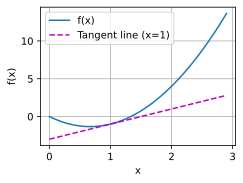

In [41]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

Now we can [**plot the function $u = f(x)$ and its tangent line $y = 2x - 3$ at $x=1$**], where the coefficient $2$ is the slope of the tangent line.

이제 함수 $u = f(x)$와 $y = 2x - 3$의 $x=1$에서의 접선을 그릴 수 있습니다. 여기서 $2$는 접선의 기울기입니다.


## Automatic Differentiation

Fortunately all modern deep learning frameworks take this work off of our plates by offering *automatic differentiation* (often shortened to *autograd*). As we pass data through each successive function, the framework builds a *computational graph*  that tracks how each value depends on others. To calculate derivatives, automatic differentiation works backwards through this graph applying the chain rule. The computational algorithm for applying the chain rule in this fashion is called *backpropagation*.


다행히도 모든 최신 딥러닝 프레임워크는 미분 작업을 자동화하기 위해 자동 미분 (자주 autograd로 약칭됨)을 제공합니다. 각 함수를 통과할 때마다 프레임워크는 각 값이 다른 값에 어떻게 의존하는지 추적하는 계산 그래프를 구성합니다. 도함수를 계산하기 위해 자동 미분은 이 그래프를 역방향으로 따라가며 연쇄 법칙을 적용합니다. 이러한 방식으로 연쇄 법칙을 적용하는 계산 알고리즘을 역전파라고 합니다.

In [42]:
import torch

# Create a tensor and set requires_grad=True to track computation with it
x = torch.tensor([3.0], requires_grad=True)

# Define a function
y = x ** 2

# Backward propagation to compute gradients
y.backward()

# Print the gradient
print(x.grad)

tensor([6.])


We first import the torch module.

먼저 torch 모듈을 가져옵니다.

We then create a tensor x with an initial value of 3. The requires_grad=True argument tells PyTorch that we want to compute gradients with respect to this tensor during the backward pass.

그런 다음 초기 값이 3인 tensor x를 생성합니다. requires_grad=True 인수는 backward pass 동안 이 tensor에 대한 gradient를 계산하려고 함을 PyTorch에 알립니다.

Next, we define a function y = x ** 2.

다음으로, 함수 y = x ** 2를 정의합니다.

We then call y.backward(), which computes the gradient of y with respect to all of its dependencies (in this case x) using the chain rule.

그런 다음 y.backward()를 호출하여 chain rule을 사용하여 y의 모든 종속성 (이 경우 x)에 대한 y의 gradient를 계산합니다.

Finally, we print x.grad, which is the gradient of y at x=3. In this case, since y=x**2, its derivative is 2*x, so at x=3, the gradient should be 2*3=6.

마지막으로 x.grad를 출력합니다. 이것은 x=3에서 y의 gradient입니다. 이 경우, y=x**2이므로 미분값은 2*x이므로, x=3에서 gradient는 2*3=6이어야 합니다.


In [43]:
import torch

# Create tensors.
x = torch.tensor([2.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)

# Define a function
z = x * y + x * x

# Backward propagation to compute gradients
z.backward()

# Print the gradients
print("Gradient of z with respect to x:", x.grad)
print("Gradient of z with respect to y:", y.grad)


Gradient of z with respect to x: tensor([7.])
Gradient of z with respect to y: tensor([2.])


Import the torch module.

torch 모듈을 가져옵니다.

Create two tensors x and y with initial values 2 and 3 respectively. requires_grad=True tells PyTorch that we want to compute gradients with these tensors during the backward pass.

초기 값이 각각 2와 3인 tensor x와 y를 생성합니다. requires_grad=True는 backward pass 동안 이 tensor들에 대한 gradient를 계산하려고 함을 PyTorch에 알립니다.

Define a function z = x * y + x * x.

함수 z = x * y + x * x를 정의합니다.

Call z.backward(), which computes the gradient of z with respect to all of its dependencies (in this case x and y) using the chain rule.

z.backward()를 호출하여 chain rule을 사용하여 z의 모든 종속성 (이 경우 x와 y)에 대한 z의 gradient를 계산합니다.

Finally, print x.grad and y.grad. These are the gradients of z at x=2 and y=3. Since z=x*y + x*x, the derivative with respect to x is y + 2*x, and the derivative with respect to y is x. So at x=2 and y=3, the gradients should be y + 2*x=3+2*2=7 and x=2, respectively.

마지막으로 x.grad와 y.grad를 출력합니다. 이것들은 x=2 및 y=3에서 z의 gradient입니다. z=x*y + x*x이므로, x에 대한 미분값은 y + 2*x이고, y에 대한 미분값은 x입니다. 따라서 x=2 및 y=3에서 gradient는 각각 y + 2*x=3+2*2=7와 x=2이어야 합니다.

## Probability and Statistics

Probability and statistics are crucial elements in deep learning. They help in dealing with uncertainties in data, adding probabilistic elements to model predictions, and often form the backbone of the optimization algorithms we use.

확률과 통계는 딥러닝의 핵심 요소입니다. 이는 데이터의 불확실성을 처리하고, 모델의 예측에 확률적인 요소를 더하는 데 중요합니다. 또한, 최적화 알고리즘에서 확률적인 접근 방식을 사용하는 것이 일반적입니다.

Probability: Probability quantifies the likelihood of occurrence of an uncertain event. The probability of an event lies between 0 and 1. There are three fundamental rules of probabilities:

확률: 확률은 불확실한 사건의 발생 가능성을 측정하는 수치입니다. 사건의 확률은 0과 1 사이의 값을 가집니다. 확률의 세 가지 기본 규칙이 있습니다:

1. The probability of an event is a non-negative real number: P(E) ≥ 0.
        
    어떤 사건의 확률은 0과 1 사이의 값을 가집니다.
    
    
2. The probability of a certain event is 1: P(S) = 1.

    확실하게 발생하는 사건(예: 주사위를 던져서 1 이상의 숫자가 나올 확률)의 확률은 1입니다.


3. Any two mutually exclusive events A and B follow the rule: P(A ∪ B) = P(A) + P(B) for A ∩ B = ∅.

    서로 배타적인 두 사건 A와 B의 합집합의 확률은 각 사건의 확률의 합과 같습니다(P(A ∪ B) = P(A) + P(B) for A ∩ B = ∅).
    
    
    
Statistics: Statistics deals with the theory and methods of using data for collection, analysis, interpretation, presentation, and modeling. It's crucial in deep learning to understand the data, extract features, and validate predictive models.

통계: 통계는 데이터의 수집, 분석, 해석, 표현, 및 모델링에 사용되는 이론 및 방법을 다룹니다. 이는 딥러닝에서 데이터를 이해하고, 특성을 추출하며, 예측 모델을 검증하는 데 중요합니다.




Now let's consider some code related to probability and statistics using PyTorch. We'll first generate a probability distribution and visualize it.

이제 PyTorch를 사용하여 확률 및 통계 관련 코드를 살펴보겠습니다. 우선 확률 분포를 생성하고, 이를 시각화해보겠습니다.


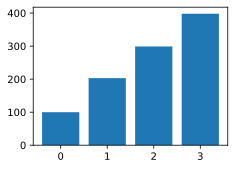

In [44]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

# 확률분포를 정의
probabilities = torch.tensor([0.1, 0.2, 0.3, 0.4])

# multinomial 분포에서 샘플링
sample = multinomial.Multinomial(1, probabilities).sample((1000,))

# 결과를 시각화
counts = sample.sum(axis=0)
plt.bar(range(len(probabilities)), counts)
plt.show()

In the code above, we first define a probability distribution. Next, we generate samples from the distribution and visualize them. This code essentially picks values based on the given probability distribution and visualizes the number of times each value was picked.

위의 코드에서는 먼저 확률 분포를 정의합니다. 다음으로, 이 분포에서 샘플을 생성하고, 이를 시각화합니다. 이 코드는 주어진 확률 분포에 따라 값을 선택하고, 각 값이 선택된 횟수를 시각화합니다.

Next, let's look at an example of computing basic statistical measures (mean, variance, etc.).

다음으로, 기초 통계량(평균, 분산 등)을 계산하는 예제를 살펴보겠습니다.

In [45]:
# 텐서 생성
x = torch.tensor([10.0, 20.0, 30.0, 40.0])

# 평균 계산
mean_x = torch.mean(x)
print("Mean of x:", mean_x)

# 분산 계산
var_x = torch.var(x)
print("Variance of x:", var_x)

Mean of x: tensor(25.)
Variance of x: tensor(166.6667)


The code above first defines a tensor x and then calculates the mean and variance of the tensor. The mean indicates the central tendency of the values, while the variance shows how spread out the values are. These statistical measures can help you understand the overall characteristics of your data.

이 코드는 먼저 텐서 x를 정의하고, 이 텐서의 평균과 분산을 계산합니다. 평균은 값의 중심 경향성을, 분산은 값의 퍼짐 정도를 나타냅니다. 이런 통계량은 데이터의 전반적인 특성을 파악하는 데 도움이 됩니다

## Documentation

### Functions and Classes in a Module (모듈 내의 함수와 클래스)

In order to know which functions and classes can be called in a module, we invoke the `dir` function. For instance, we can (**query all properties in the module for generating random numbers**):

모듈에서 어떤 함수와 클래스를 호출할 수 있는지 알기 위해, 우리는 dir 함수를 사용합니다. 예를 들어, 우리는 (모듈에서 무작위 숫자를 생성하는 모든 속성을 쿼리할 수 있습니다):


In [46]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

Generally, we can ignore functions that start and end with `__` (special objects in Python) or functions that start with a single `_`(usually internal functions). Based on the remaining function or attribute names, we might hazard a guess that this module offers various methods for generating random numbers, including sampling from the uniform distribution (`uniform`), normal distribution (`normal`), and multinomial distribution (`multinomial`).

일반적으로, 우리는 __로 시작하고 끝나는 함수(파이썬의 특수 객체)나 단일 _로 시작하는 함수(보통 내부 함수)를 무시할 수 있습니다. 남은 함수나 속성 이름을 기반으로, 이 모듈이 균일 분포(uniform), 정규 분포(normal), 다항 분포(multinomial)에서 샘플링을 포함한 다양한 무작위 숫자 생성 방법을 제공할 것으로 추측할 수 있습니다.


### Specific Functions and Classes (특정 함수와 클래스)

For more specific instructions on how to use a given function or class, we can invoke the  `help` function. As an example, let's [**explore the usage instructions for tensors' `ones` function**].

주어진 함수나 클래스를 어떻게 사용하는지에 대한 더 구체적인 지침을 얻기 위해, 우리는 help 함수를 사용할 수 있습니다. 예시로, 텐서의 ones 함수에 대한 사용 지침을 (탐색해봅시다).

In [47]:
help(torch.ones)

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None